In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from find_walking_frames import find_walking_data
from pre_process import conv_acceleration, find_period_acf

directory = 'data/'

subject_num = '1'

In [24]:
sub_walks = find_walking_data(subject_num, directory)

walk_df = sub_walks['01_06'][1][['acc_rt_x','acc_rt_y','acc_rt_z','acc_lt_x','acc_lt_y','acc_lt_z']]

df_accel = pd.DataFrame(None)

for column in walk_df.columns:
    df_accel[column] = walk_df[column].apply(conv_acceleration)

df_accel = df_accel[200:(-1 - 200)]

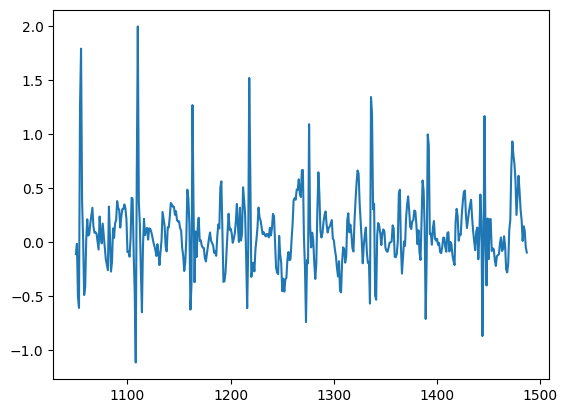

In [25]:
plt.plot(df_accel['acc_rt_y'])

In [26]:
period = find_period_acf(df_accel['acc_rt_y'], 150)

In [27]:
# Find location of maximum of the first 1.75 periods

max_idx = np.argmax(df_accel['acc_rt_y'][0:7*period//4])

df_accel_4p = df_accel[max_idx:max_idx + 4*period]

four_period_rt_y = np.array(df_accel_4p['acc_rt_y'])

four_period_rt_y

array([ 1.99993896,  0.37060547,  0.16748047, -0.27050781, -0.6484375 ,
       -0.03662109,  0.21728516,  0.06542969,  0.11962891,  0.1328125 ,
        0.02441406,  0.12841797,  0.12548828,  0.09765625,  0.05517578,
        0.00585938, -0.03222656, -0.0703125 , -0.12695312, -0.01757812,
       -0.10302734, -0.2109375 , -0.08935547,  0.015625  ,  0.28076172,
        0.21289062,  0.14990234, -0.04052734, -0.08447266,  0.13818359,
        0.13720703,  0.23730469,  0.36425781,  0.35009766,  0.32910156,
        0.33007812,  0.25439453,  0.28808594,  0.20410156,  0.19189453,
        0.19433594,  0.12939453,  0.109375  , -0.05322266, -0.125     ,
       -0.26611328, -0.18701172,  0.03125   ,  0.48730469,  0.40625   ,
        0.16894531, -0.62451172, -0.39746094,  1.27099609,  0.33984375,
       -0.37011719,  0.10058594, -0.13720703,  0.12744141,  0.22705078,
        0.01220703,  0.01855469, -0.03173828, -0.04980469, -0.05322266,
       -0.14746094, -0.17773438, -0.10546875, -0.03173828,  0.03

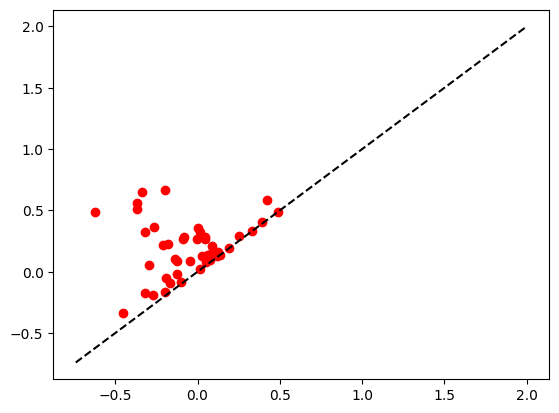

In [28]:
from teaspoon.TDA.SLSP import Persistence0D

feature_ind1, feature_ind_2, persistenceDgm = Persistence0D(four_period_rt_y)

# Persistence0D outputs the intervals in ascending length order, so in order to drop the four largest, we can just take a slice D[0:-4]
R = persistenceDgm[:-4]

plt.plot(R.T[0], R.T[1], 'ro')
plt.plot([min(four_period_rt_y),max(four_period_rt_y)],[min(four_period_rt_y),max(four_period_rt_y)], 'k--')

In [29]:
# Find location of maximum of the first 1.75 periods

max_idx = np.argmax(df_accel['acc_lt_y'][0:7*period//4])

df_accel_4p = df_accel[max_idx:max_idx + 4*period]

four_period_lt_y = np.array(df_accel_4p['acc_lt_y'])

four_period_lt_y

array([ 1.05126953e+00,  2.35839844e-01,  1.35742188e-01, -1.56250000e-01,
       -2.04101562e-01,  1.26953125e-02,  8.20312500e-02, -2.44140625e-03,
       -1.17187500e-01, -8.98437500e-02,  4.88281250e-02,  1.08886719e-01,
        4.78515625e-02,  1.32324219e-01,  1.82617188e-01,  3.07617188e-02,
       -4.15039062e-02, -1.36230469e-01, -1.34277344e-01,  9.96093750e-02,
        1.87988281e-01,  6.25000000e-02, -4.78515625e-02, -1.15234375e-01,
       -5.57128906e-01, -8.00292969e-01, -9.76562500e-03,  7.03125000e-01,
        5.67382812e-01,  3.89160156e-01,  3.70117188e-01,  1.84570312e-01,
        6.10351562e-02,  3.51562500e-02,  6.34765625e-02,  1.56250000e-01,
        2.28515625e-01,  1.12792969e-01, -9.08203125e-02, -1.01562500e-01,
       -2.41699219e-01, -2.23632812e-01, -1.47460938e-01, -9.86328125e-02,
       -4.10156250e-02,  2.44140625e-02,  3.85742188e-02, -3.03222656e-01,
       -3.43261719e-01,  6.64062500e-02,  1.35742188e-01,  3.60839844e-01,
        2.29492188e-02, -

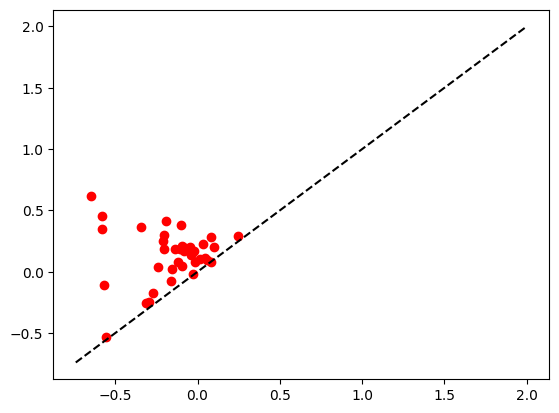

In [30]:
feature_ind1, feature_ind_2, persistenceDgm = Persistence0D(four_period_lt_y)

# Persistence0D outputs the intervals in ascending length order, so in order to drop the four largest, we can just take a slice D[0:-4]
L = persistenceDgm[:-4]

plt.plot(L.T[0], L.T[1], 'ro')
plt.plot([min(four_period_rt_y),max(four_period_rt_y)],[min(four_period_rt_y),max(four_period_rt_y)], 'k--')

(0.25244140625,
 array([[ 0.00000000e+00,  3.10000000e+01,  2.42675781e-01],
        [ 1.00000000e+00,  1.90000000e+01,  2.45605469e-01],
        [ 2.00000000e+00, -1.00000000e+00,  9.76562500e-04],
        [ 3.00000000e+00,  2.10000000e+01,  2.37792969e-01],
        [ 4.00000000e+00,  2.20000000e+01,  1.53808594e-01],
        [ 5.00000000e+00,  1.70000000e+01,  1.51855469e-01],
        [ 6.00000000e+00,  4.00000000e+00,  1.97753906e-01],
        [ 7.00000000e+00, -1.00000000e+00,  7.56835938e-03],
        [ 8.00000000e+00,  9.00000000e+00,  8.83789062e-02],
        [ 9.00000000e+00,  1.50000000e+01,  2.10449219e-01],
        [ 1.00000000e+01, -1.00000000e+00,  1.58691406e-02],
        [ 1.10000000e+01,  1.20000000e+01,  1.53320312e-01],
        [ 1.20000000e+01,  0.00000000e+00,  8.20312500e-02],
        [ 1.30000000e+01,  1.30000000e+01,  1.60156250e-01],
        [ 1.40000000e+01,  8.00000000e+00,  2.26562500e-01],
        [ 1.50000000e+01,  1.00000000e+01,  7.86132812e-02],
        

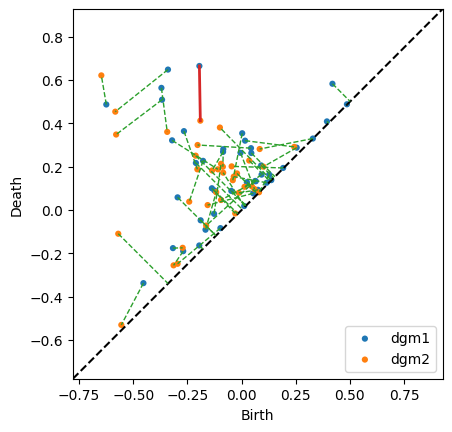

In [31]:
from teaspoon.TDA.Distance import bottleneckDist

bottleneckDist(R,L)

